In [1]:
%matplotlib inline

from visualiser import *

from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

In [2]:
dropdown = widgets.Dropdown(options=list(all_bots),description='Bot')
slider = widgets.IntSlider(min(steps[dropdown.value]),min=min(steps[dropdown.value]),max=max(steps[dropdown.value]),description='Step',width='100%',continuous_update=False)
button_next = widgets.Button(description = "Next")
button_prev = widgets.Button(description = "Prev")
q_arrows = widgets.Text(description = "Arrows",value='frontierDir')
q_heat = widgets.Text(description = "HeatMap",value='production')
q_size = widgets.Text(description = "Size",value='strength')
q_color = widgets.Text(description = "Color",value='owner')

def get_state():
    return {
        'color':q_color.value if q_color.value else None,
        'heat':q_heat.value if q_heat.value else None,
        'size':q_size.value if q_size.value else None,
        'arrows':q_arrows.value if q_arrows.value else None
    }

def push_next(_):
    current = slider.value
    new = str(int(current)+1)
    slider.value = new
    
def push_prev(_):
    current = slider.value
    new = str(int(current)-1)
    slider.value = new

def observe_slider(change):
    step = change['new']
    state = get_state()
    res = 16
    
    figure = plt.figure(figsize=(8,8))
    
    cache_key = (step,) + tuple(state.values())
    
    if cache_key in im_cache:
        cached_ims = im_cache[cache_key]
        plot_ims(cached_ims=cached_ims)
    else:
        with open('dumps/{}'.format(get_gamemap(step,dropdown.value)),'rb') as f:
            myID,gameMap = pickle.load(f)
        ims = plot_ims(gameMap,state)
        im_cache[cache_key] = ims
        
    clear_output()
    

slider.observe(observe_slider,names='value')

button_next.on_click(push_next)
button_prev.on_click(push_prev)



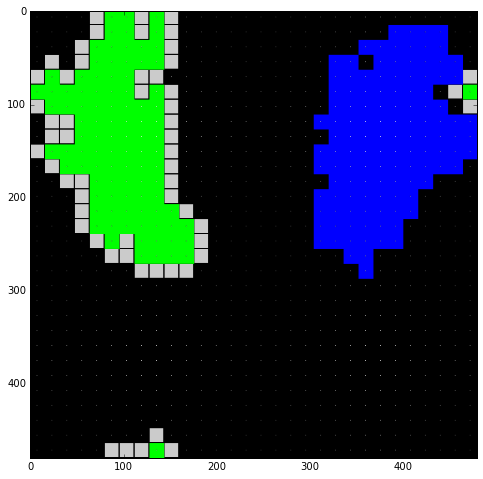

In [3]:
display(dropdown)
display(widgets.HBox([q_color,q_heat]))
display(widgets.HBox([q_size,q_arrows]))
display(slider)
display(widgets.HBox([button_prev,button_next]))

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
del im_cache
im_cache = {}